In [1]:
import numpy as np
from rt_plot import gen_RT_data
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import copy
from scipy import stats
import matplotlib as mpl

from eval_asym_metric import calcAsymScore, plotAsymScore

In [2]:
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
blk_col = '#000000'

mpl.rc('axes', edgecolor=blk_col, labelcolor=blk_col)
mpl.rc('xtick', color=blk_col)
mpl.rc('ytick', color=blk_col)
mpl.rc('text', color=blk_col)

plt.rcParams.update({'font.size': 11})
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})
mpl.rcParams['lines.linewidth'] = 1.3
mpl.rcParams['axes.linewidth'] = 1.3
mpl.rcParams['xtick.major.width'] = 1.3
mpl.rcParams['ytick.major.width'] = 1.3

In [3]:
rt_fxn_model = {'slope': 252.359, 'intercept': 376.271}

In [6]:
methods = np.array(os.listdir("./eccNET/out/")+["pixelMatch", "chance", "gbvs"])
dirs = ['./eccNET/out/']*(len(methods)-3)+["./"]*3

task_ids = [*range(6)]

score_overall = []
for n in tqdm(range(len(methods)), desc="Generating Asymmetry Index Scatter Plots..."):
    method = methods[n]
    if method[0] != '.':
        all_fxn_data, all_fxn_seq = gen_RT_data(method, dirs[n], rt_fxn_model, task_ids)
        score = calcAsymScore(all_fxn_data, all_fxn_seq)[0]
        print(method+":", np.round(np.mean(score), 3))
        score_overall.append([method, np.round(np.mean(score), 3)])
        plotAsymScore(all_fxn_data, all_fxn_seq)
        
score = calcAsymScore(all_fxn_data, all_fxn_seq, True)[0]
print("Humans"+":", np.round(np.mean(score), 3))
score_overall.append(["Humans", np.round(np.mean(score), 3)])
print("-----------------------------------------\n")

eccNET: 0.513
eccNET_2_4_VSM_nosal_MNIST: 0.185
eccNET_Rot90: -0.405
eccNET_VSM_0_1_0: 0.386
IVSN: 0.316
eccNET_VSM: 0.513
IVSN_1_1_1: 0.052
eccNET_2_4_VSM_nosal_90: -0.405
eccNET_MNIST_1: 0.185
eccNET_noecc: 0.052
IVSN_1_0_0: 0.032
eccNET_VSM_0_0_1: 0.084
eccNET_Rot90_1: -0.405
eccNET_0_0_1: 0.084


OSError: ./eccNET/out/eccNET_VSM_1_1_1/out_data/curvature_curve_in_lines.csv not found.

In [4]:
methods = np.array(os.listdir("./eccNET/out/")+["pixelMatch", "chance", "gbvs"])
dirs = ['./eccNET/out/']*(len(methods)-3)+["./"]*3

task_ids = [*range(6)]

score_overall = []
for n in tqdm(range(len(methods)), desc="Generating Asymmetry Index Scatter Plots..."):
    method = methods[n]
    if method[0] != '.':
        all_fxn_data, all_fxn_seq = gen_RT_data(method, dirs[n], rt_fxn_model, task_ids)
        score = calcAsymScore(all_fxn_data, all_fxn_seq)[0]
        print(method+":", np.round(np.mean(score), 3))
        score_overall.append([method, np.round(np.mean(score), 3)])
        plotAsymScore(all_fxn_data, all_fxn_seq)
        
score = calcAsymScore(all_fxn_data, all_fxn_seq, True)[0]
print("Humans"+":", np.round(np.mean(score), 3))
score_overall.append(["Humans", np.round(np.mean(score), 3)])
print("-----------------------------------------\n")

eccNET: 0.513
eccNET_0_0_1: 0.084
eccNET_MNIST: 0.185
eccNET_noecc: 0.052
eccNET_Rot90: -0.405
IVSN: 0.316
pixelMatch: -0.178
chance: -0.003
gbvs: -0.018

Humans: 0.564
-----------------------------------------



[['Humans' '0.564']
 ['eccNET' '0.513']
 ['IVSN' '0.316']
 ['eccNET_MNIST' '0.185']
 ['eccNET_0_0_1' '0.084']
 ['eccNET_noecc' '0.052']
 ['chance' '-0.003']
 ['gbvs' '-0.018']
 ['pixelMatch' '-0.178']
 ['eccNET_Rot90' '-0.405']]


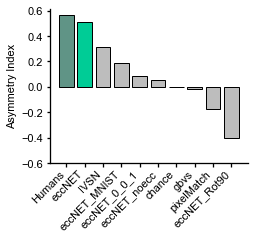

In [5]:
model_scores = np.array(score_overall)
score_idx = np.flip(np.argsort(np.array(model_scores[:, 1], dtype=np.float32)))
model_scores = model_scores[score_idx]
print(model_scores)

plt.figure(figsize=(4.25/1.2, 4.25/1.5))
ax = plt.subplot(111)

N = model_scores.shape[0]
idx = np.arange(0, 10*N, 10)

ax.bar(idx, (np.array(model_scores[:, 1], dtype=np.float32)), 8, color=["#609486", "#00CC96"]+(N-2)*["#BDBDBD"], edgecolor=blk_col)
plt.ylabel("Asymmetry Index")
plt.xticks(idx, model_scores[:, 0], rotation=45, position=(0.0, 0.01), va="top", ha="right", color=blk_col)
plt.yticks(np.arange(-0.6, 0.65, 0.2))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig("results/asymIndexBarPlot.pdf", dpi=200, bbox_inches="tight")
# plt.close()